In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import math 
from math import exp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB


rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

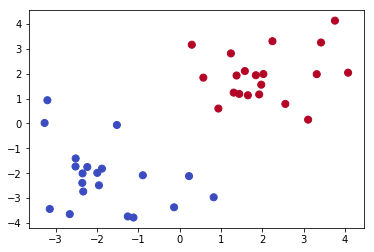

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

**Training a linear svm model**

In [3]:
# instaiate a model
clf = svm.SVC(kernel='linear', C=100000)

# fit the model
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### a. Report the separating hyperplane (line).

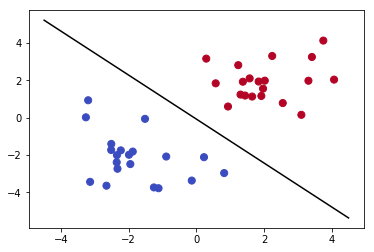

In [4]:
# your code here

# get the coef vector from the svm model
w = clf.coef_[0]

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
a = -w[0] / w[1]
x1 = np.linspace(-4.5, 4.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the points and the separating line
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1, x2, 'k-')
plt.show()


#### b. List the support vectors.

In [5]:
# your code here
sv1 = clf.support_vectors_[:2]
sv2 = clf.support_vectors_[-1]

print 'Support vectors of the blue points:', sv1
print 'Support vectors of the red points:', sv2

Support vectors of the blue points: [[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]]
Support vectors of the red points: [ 0.93564585  0.5969359 ]


In [6]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

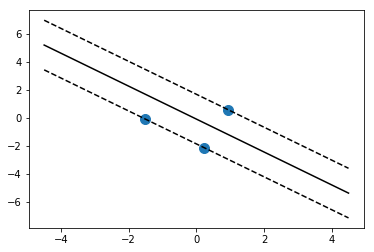

In [7]:
# your code here

# plot the parallels to the separating hyperplane (slope = a) 
# that go through the support vectors
x2_down = a * x1 + (sv1[0][1] - a * sv1[0][0]) #choose one sv for the blue points
x2_up = a * x1 + (sv2[1] - a * sv2[0]) #b=y-ax

# plot the plane, the margin's boundary, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100)
plt.show()

#### d. Compute the width of the margin.

the margin is $M=\frac{1}{||w||}$

In [8]:
# your code here
M = 1 / np.sqrt(w[0]**2 + w[1]**2)
print 'Margin is equal to:', M

Margin is equal to: 1.14889967521


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

Hyperparameter C and regularization are inversely related. Smaller C means more regularization which in turn means smaller coefficients. The margin is defined by the fraction 1/||W||, therefore smaller coefficients would result in larger margins. Larger margins help the model generalize better on unseen data although it might misclassify some of the training data points. 

**repeat the steps above for a smaller c value**

In [9]:
# instaiate a model
clf = svm.SVC(kernel='linear', C=0.1)

# fit the model
clf.fit(X, Y)

# get the coef vector from the svm model
w = clf.coef_[0]

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
a = -w[0] / w[1]
x1 = np.linspace(-4.5, 4.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# your code here
sv1 = clf.support_vectors_[:3]
sv2 = clf.support_vectors_[3:]

print 'Support vectors of the blue points:', sv1
print 'Support vectors of the red points:', sv2

Support vectors of the blue points: [[ 0.22627536 -2.11810965]
 [-3.19880191  0.93170517]
 [-1.5180363  -0.06399383]]
Support vectors of the red points: [[ 1.30611002  1.23680013]
 [ 0.93564585  0.5969359 ]
 [ 0.57220517  1.83909523]]


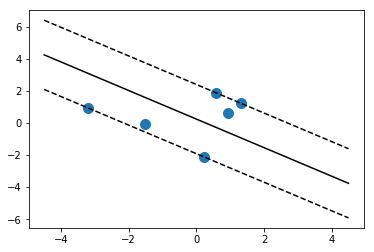

In [10]:
# plot the parallels to the separating hyperplane (slope = a) 
# that go through the support vectors
x2_down = a * x1 + (sv1[0][1] - a * sv1[0][0]) #choose one sv for the blue points
x2_up = a * x1 + (sv2[0][1] - a * sv2[0][0]) #b=y-ax

# plot the plane, the margin's boundary, and the nearest vectors to the plane
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100)
plt.show()

In [11]:
# calculate the margin
M = 1 / np.sqrt(w[0]**2 + w[1]**2)
print 'Margin is equal to:', M

Margin is equal to: 1.61157874672


## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

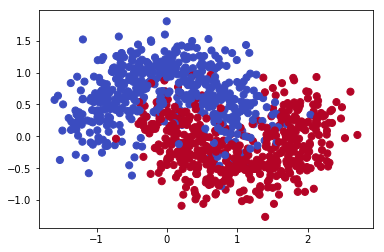

In [12]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [13]:
# your code here

# Polynomial kernel. (Default C=1, Poly=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
correct_train=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_test=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "In sample, the polynomial kernel successfully predicts {:.4} percent of the data".format((correct_train)*100)
print "Out of sample, the polynomial kernel successfully predicts {:.4} percent of the data".format((correct_test)*100)

In sample, the polynomial kernel successfully predicts 81.34 percent of the data
Out of sample, the polynomial kernel successfully predicts 82.73 percent of the data


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


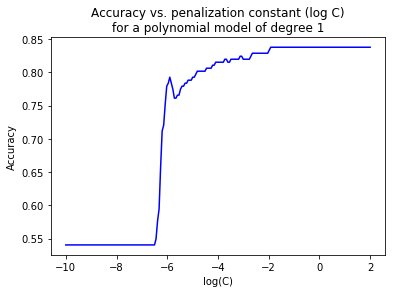

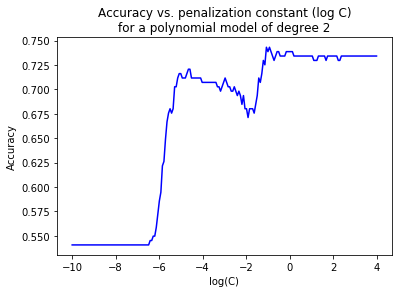

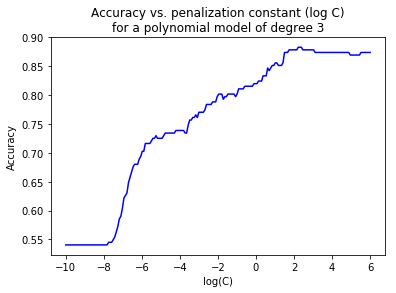

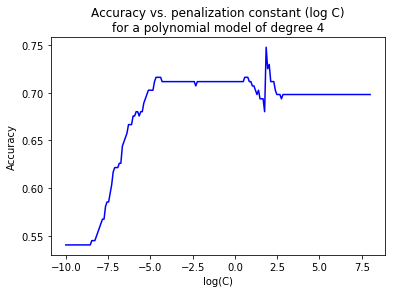

In [14]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

for d in range(1,5):  # degree space
    C=[math.exp(i) for i in np.linspace(-10,2*d,200)]  # c space
    OS_validation = []
    for c in C:
        clf = svm.SVC(kernel='poly', degree=d, C=c) 
        clf.fit(X_train, Y_train)
        correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C, OS_validation,'b',)
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title('Accuracy vs. penalization constant (log C)\nfor a polynomial model of degree {}'.format(d))
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

According to the graphs above a polynomial model of degree 3 has the highest validation accuracy close to 87%. High accuracy is achieved with a value of C equal or greater to log(2). 

In [15]:
# your code here

C = math.exp(2)
# Polynomial kernel of degree 3 and c=log(2)
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X_train, Y_train)
correct_train=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_test=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "In sample, the polynomial kernel successfully predicts {:.4} percent of the data".format((correct_train)*100)
print "Out of sample, the polynomial kernel successfully predicts {:.4} percent of the data".format((correct_test)*100)

In sample, the polynomial kernel successfully predicts 86.27 percent of the data
Out of sample, the polynomial kernel successfully predicts 87.88 percent of the data


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

### a) Calculate the following sample probabilities:

P(Yes) = 6/11 = 0.54

P(No) = 5/11 = 0.45

P(Red|Yes) = 5/6 = 0.83

P(SUV|Yes) = 0.33

P(Domestic|Yes) = 3/6 = 0.5

P(Red|No) = 2/5 = 0.4

P(SUV|No) = 3/5 = 0.6

P(Domestic|No) = 3/5 = 0.6

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.

Naive Bayes assumption: All predictors are conditionally independent given a certain class. The joint probability of independent events is the product of individual probabilities. Therefore for color, origin and car type, we can multiply the three individual likelihoods.

P(Red ∩ Domestic ∩ SUV | Yes)  
= P(Red | Yes) P(Domestic | Yes) P(SUV | Yes)  
= 0.83 x 0.5 x 0.33  
= 0.13695

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [16]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print X_train.head()
print
print y_train.head()

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: y, dtype: float64


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [17]:
# your code here

# instantiate a gaussian naive bayes model
gnb = GaussianNB()

# fit the model to the training data
gnb.fit(X_train, y_train)

# measure accuracy on the train data
print 'In sample accuracy:', gnb.score(X_train, y_train)

# measure accuracy on the test data
print 'Out of sample accuracy:', gnb.score(X_test, y_test)

In sample accuracy: 0.758474576271
Out of sample accuracy: 0.791139240506


### b) What is the prior probability of diabetes, learned from the training data?

In [18]:
# our code here
P_diabetes = sum(y_train) / len(y_train)
print 'Prior probability of diabetes learned from training data:', P_diabetes

Prior probability of diabetes learned from training data: 0.300847457627


### c) What is the mean and variance of each input variable for patients with diabetes?

In [19]:
# your code here

# subet the training data to those with diabetes only
X_train_1 = X_train[y_train==1]

for c in X_train_1.columns:
    print c+'_mu=', X_train_1[c].mean()
    print c+'_sigma', X_train_1[c].std()
    print

t_pre_mu= 4.07042253521
t_pre_sigma 3.51861963057

glu_mu= 144.14084507
glu_sigma 30.626457178

blood_p_mu= 74.5633802817
blood_p_sigma 13.7993088796

triceps_mu= 33.4788732394
triceps_sigma 9.76269745354

serum_mu= 209.211267606
serum_sigma 126.921000794

b_m_mu= 35.223943662
b_m_sigma 6.25849057084

pedigree_f_mu= 0.639042253521
pedigree_f_sigma 0.439042023261

age_mu= 35.7887323944
age_sigma 10.2635492231



### d) What is the mean and variance of each input variable for patients without diabetes?

In [20]:
# your code here

# subet the training data to those without diabetes only
X_train_0 = X_train[y_train==0]

for c in X_train_0.columns:
    print c+'_mu=', X_train_0[c].mean()
    print c+'_sigma', X_train_0[c].std()
    print

t_pre_mu= 2.69090909091
t_pre_sigma 2.6100606988

glu_mu= 111.466666667
glu_sigma 24.6918899822

blood_p_mu= 69.2060606061
blood_p_sigma 11.7132908509

triceps_mu= 27.2
triceps_sigma 10.4369185248

serum_mu= 127.006060606
serum_sigma 91.4861376258

b_m_mu= 31.7090909091
b_m_sigma 6.33761340575

pedigree_f_mu= 0.468684848485
pedigree_f_sigma 0.291750327733

age_mu= 28.3939393939
age_sigma 8.53736191168



## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [21]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print X_Labeled_train
print
print y_Labeled_train

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [22]:
# your code here

# instantiate a discret Naive Bayes Classifier
dnb = MultinomialNB()

# fit the classifier to the labeled training data
dnb.fit(X_Labeled_train, y_Labeled_train)

# predict on the labeled test data
y_pred_Labeled_test = dnb.predict_proba(X_Labeled_test)[:,1]

# measure out of sample accuracy
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_Labeled_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

Out of sample prediction accuracy: 0.5


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [23]:
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print 'Iteration',t,'of',num_iters
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled], ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled], ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [24]:
EMnb = EM(X_Labeled_train, y_Labeled_train, X_Unlabeled_train, num_iters=50)

y_pred_Labeled_test = testNaiveBayesDiscrete(X_Labeled_test,EMnb)

# measure accuracy for the binary prediction task
print 'Out of sample prediction accuracy:',1.0*sum((y_pred_Labeled_test>0.5)==y_Labeled_test)/len(y_Labeled_test)

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
Out of sample prediction accuracy: 0.944444444444
